## 自动控制理论
---   

- 控制的目的不就是为了让输出能稳定地跟随输入吗？  
- 系统的稳定性（抗干扰）不就是在受到短暂的扰动（类似脉冲）后还能迅速回到平稳状态吗？  
- 所以稳定性与抗干扰的概念不要混了


### 控制系统的数学模型  

#### 控制系统框图中的概念  
- $r(t)$: 给定输入  
- $b(t)$: 反馈  
- $e(t)$: 误差  
- $u(t)$: 控制器的输出  
- $c(t)$: 输出  
- $d(t)$: 扰动  

叠加性: $若有r_1(t) \rightarrow c_1(t), r_2(t) \rightarrow c_2(t), 则有r_1(t)+r_2(t) \rightarrow c_1(t)+c_2(t)$  
齐次性: $若有r(t) \rightarrow c(t), 则有ar(t) \rightarrow c(t)$   
记住: $r(t)$ 是输入  

#### 数学模型  
对于线性定常系统，常用以下四种模型来描述：微分方程、传递函数、结构图和信号流图。其中微分方程是基础，其他模型都是由微分方程演变来的。  
另外，在时域中我们还会用差分方程描述离散时间系统、状态方程描述多输入多输出的系统。  

列些微分方程的前提是熟悉系统各组件的物理特性，但是很多系统组件并非线性的，这就需要我们在某一范围内将非线性组件当作线性化处理。主要方法就是小偏差法：在元件工作点的邻域内把非线性特性函数展开为泰勒级数。

### 拉普拉斯变换  
通过拉普拉斯变换求解的一般过程：  
1. 将微分方程进行拉普拉斯变换；  
2. 将输入量、以及初始条件代入变换方程进行求解（关于输出$C(s)$的解）；  
3. 将输出量的拉普拉斯变换函数转化为部分分式；  
4. 对部分分式进行反变换，得到输出量的时域表达式$c(t)$。  


#### 拉普拉斯变换的性质  

> todo 补全拉普拉斯变换的性质

微分性质：
- $L[\frac{du}{dt}]=sU(s)-U(0)$
- $L[\frac{d^2u}{dt^2}]=s^2U(s) - sU(0)-U'(0)$
积分性质：  
- $L[\int{udt}]=\frac{1}{s}U(s)$

常见函数的拉普拉斯变换：
- $\delta(t) \rightarrow 1$: DiracDelta(t), 狄拉克德尔塔, 单位冲击函数  
- $\theta(t) \rightarrow \frac{1}{s}$: Heaviside(t), 赫维赛德, 单位阶跃函数  
- $cos(\omega t) \rightarrow \frac{s}{s^2+\omega^2}$: 余弦函数
- $sin(\omega t) \rightarrow \frac{\omega}{s^2+\omega^2}$: 正弦函数  
- $e^{\tau t} \rightarrow \frac{1}{s-\tau}$: 自然底数的指数



#### 传递函数  
传递函数的一般形式：$G(s) = \frac{C(s)}{R(s)} = \frac{b_ms^m+b_{m-1}s^{m-1}...+b_1s+b_0}{a_ns^n+a_{n-1}s^{n-1}...+a_1s+a_0}$，可由系统的拉普拉斯变换方程得到。因为一般系统都具有惯性，所以$m \le n$。  
需要注意的是：  
1. 传递函数只适用于线性定常系统  
2. 传递函数与输入信号无关，表示系统的固有属性  
3. 拉普拉斯逆变换，可由微分算子$p=\frac{d}{dt}$替换复变量$s$，并用输入输出函数$c(t),r(t)$替换掉传递函数中的象函数$C(s),R(s)$得到  
4. 传递函数是在系统零初始条件下定义的  
5. 传递函数可以在零初始条件下通过输入单位冲激函数获得    


例如：$G(s) = \frac{C(s)}{R(s)} = \frac{5}{s^2+3s+2}$  
1. 将传递函数展开：$5R(s)=s^2C(s)+3sC(s)+2C(s)$   
2. 用输入输出函数替换掉象函数：$5r(t)=s^2c(t)+3sc(t)+2c(t)$  
3. 用$p=\frac{d}{dt}$替换掉$s$：$5r(t)=\frac{d^2c(t)}{dt^2}+3\frac{dc(t)}{dt}+2c(t)$

#### 典型环节的传递函数  
以单位冲激函数$r(t) = \delta(t)$作为输入  
1. 比例环节：$c(t)=Kr(t) \rightarrow G(s)=K$  
2. 微分环节：$c(t)=\frac{dr(t)}{dt} \rightarrow G(s)=s$  
3. 积分环节：$c(t)=\int{r(t)dt} \rightarrow G(s)=\frac{1}{s}$  
4. 惯性环节环节：$T\frac{dc(t)}{dt}+c(t) = r(t) \rightarrow G(s)=\frac{1}{Ts+1}$，$c'(t)=\frac{r(t)-c(t)}{T}$输出总是根据输入变化，但是变化率与$T$有关    
5. 一阶微分环节：$c(t)=\tau\frac{dr(t)}{dt}+r(t) \rightarrow G(s)=\tau s+1$，相当于比例加微分  
6. 二阶微分环节：$c(t)=\tau^2\frac{d^2r(t)}{dt^2}+ 2\zeta\tau\frac{dr(t)}{dt}+r(t)+ r(t) \rightarrow G(s)=\tau^2s^2+2\zeta\tau s+1,, 0 < \zeta <1$，相当于二次微分环节与一阶微分并联  
7. 震荡环节：$T^2\frac{d^2c(t)}{dt^2}+2T\xi\frac{dc(t)}{dt}+c(t)=r(t) \rightarrow G(s)=\frac{1}{T^2s^2+2\xi Ts+1},, 0<\xi < 1$  
8. 延迟环节：$c(t)=r(t-\tau) \rightarrow G(s)=e^{-\tau s}$


### 梅森增益公式  
课本上关于梅森增益公式的实现其实讲述的并不好，如果能给出推导过程则基本不用记各种余子式等复杂的概念：
假设系统有5个节点：$n_1,n_2,n_3,n_4,n_5$。连接关系如下表所示，节点$n_1$为输入，$n_5$表示输出节点。   

输入节点|输出节点|增益  
---|---|---
$n_1$|$n_2$|G1
$n_2$|$n_3$|G2
$n_3$|$n_4$|G3
$n_4$|$n_5$|G4
$n_4$|$n_2$|-H2
$n_5$|$n_3$|-H3
$n_5$|$n_1$|-H1  
 
则有：  
$$\left\{\begin{array}{lllll}
    n_1= & 0n_1   & + 0n_2   & + 0n_3   & + 0n_4   & + (-H_1)n_5 & + 1R(s) \\  
    n_2= & G_1n_1 & + 0n_2   & + 0n_3   & + 0n_4   & + 0n_5      & + 0R(s) \\
    n_3= & 0n_1   & + G_2n_2 & + 0n_3   & + 0n_4   & + (-H_3)n_5 & + 0R(s) \\
    n_4= & 0n_1   & + 0n_2   & + G_3n_3 & + 0n_4   & + 0n_5      & + 0R(s) \\
    n_5= & 0n_1   & + 0n_2   & + 0n_3   & + G_4n_4 & + 0n_5      & + 0R(s)
 \end{array}\right.$$

还可以写作矩阵的形式：  
$$\left|\begin{array}{c}
n_1 \\
n_2 \\
n_3 \\
n_4 \\
n_5  
\end{array}\right|=\mathbf{A}\cdot\left|\begin{array}{c}
n_1 \\
n_2 \\
n_3 \\
n_4 \\
n_5  
\end{array}\right|+\left|\begin{array}{c}
R(s) \\
0 \\
0 \\
0 \\
0  
\end{array}\right| \\\\
即：\overrightarrow{N}=\mathbf{A} \cdot \overrightarrow{N} + \overrightarrow{v} \cdot R(s)$$

### 传递函数的概念  
- $R(s)$：输入  
- $D(s)$：扰动  
- $C(s)$：输出  
- $B(s)$：反馈  
- $E(s)=R(s)-B(s)$：误差

1. 开环传递函数：$G(s)=\frac{B(s)}{E(s)}$  
2. 闭环传递函数：  
    a. 输入信号：$\Phi_r(s)=\frac{C(s)}{R(s)}$  
    b. 扰动信号：$\Phi_d(s)=\frac{C(s)}{D(s)}$  
    c. 系统总输出：$\Phi(s)=\Phi_r(s)R(s)+\Phi_d(s)D(s)$   
3. 误差传递函数：$\Phi(s)=\frac{E(s)}{R(s)}$

### Python代码  

#### 系统零极点分布  
已知系统的传递函数为$G(s)=\frac{s^2+s-2}{s^3+5s^2+8s+6}$，求其零极点形式的增益，以及零极点分布图：

(array([-3.+0.j, -1.+1.j, -1.-1.j]), array([-2.,  1.]))

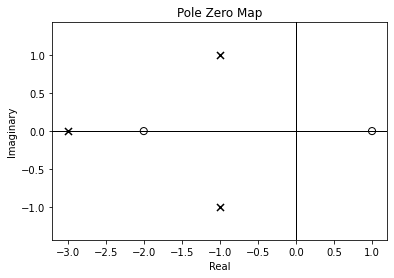

In [1]:
from control import *     #导入control包，没有的可以使用pip install control命令进行安装
from matplotlib import pyplot as plt    #导入matplotlib包进行绘图

%matplotlib inline

sy1 = tf([1,1,-2],[1,5,8,6])     #将参数按照tf命令的格式赋值给sy1，前一个[]是分子中s的参数，第二个[]是分母s的参数

pzmap(sy1)
# 输出结果分别为p, z, k?


#### 控制系统模型的建立
系统的各环节传递函数如下：  
$$\left\{
    \begin{array}{ll}
    G_1(s) = \frac{1}{s+10} & H_1(s) = 1 \\\\
    G_2(s) = \frac{1}{s+2} & H_2(s) = 1 \\\\
    G_3(s) = \frac{s+1}{s^2+4s+10} & H_3(s) = \frac{s+1}{s+2} \\\\
    G_4(s) = \frac{s+1}{s^2+6}
    \end{array}
\right\}$$

TransferFunction(array([1, 5, 9, 7, 2]), array([   1,   19,  136,  610, 1850, 4093, 6604, 6411, 2542]))

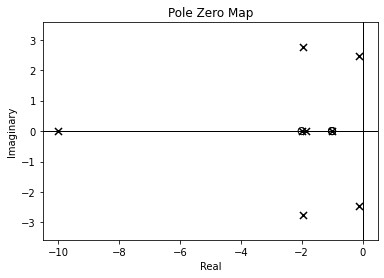

In [2]:
# 1. 列出各子节点的传递函数  
G1=tf([1],[1, 10])
G2=tf([1],[1,2])
G3=tf([1,1],[1,4,10])
G4=tf([1,1],[1,0,6])
H1=tf([1],[1])
H2=tf([1],[1])
H3=tf([1,1],[1,2])

# 连接子系统，并返回一个新的系统
# sys = series(G1, G2)  # 串联
# sys = parallel(G1, G2) # 并联
# sys = feedback(G1, H1, sign=-1) # 负反馈

# 需要注意的是，与梅森增益公式不同，使用系统的串并联来解决问题时，需要手动消除交叉回路
sys = series(G3, G4)
sys = feedback(sys, H3, -1)
sys = series(G2, sys)
sys = feedback(sys, series(H2,1/G4), -1)
sys = series(G1,sys)
sys = feedback(sys, H1, -1)


pzmap(sys)
sys

